<a href="https://colab.research.google.com/github/anakhashibu1999/ML-projects/blob/main/Analysis(hotel_data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA ANALYSIS OF HOTEL DATASET**




*l am dealing with predictive analysis,EDA(exploritry data analysis and model fitting.*
*Here i choosen for data analysis is hotel bookings*

***1.Main objective of a hotel***
 ***2.what,why,and where is data science invole***
 **3.implementation**.***4.dataset is from kaggle.***

 *Predictive Analysis - is used tp predict the outcome of any event*
 *In case of hotel booking it will predict the number of booking in the comming month, the number of cancellations etc.*

**Data Collection**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns                        #visualization
import matplotlib.pyplot as plt              #visualization
%matplotlib inline
import plotly.express as px
import folium
sns.set(color_codes=True)                    #default colours are used


#for ML:
from sklearn.model_selection import train_test_split, KFold,cross_validate,cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


df=pd.read_csv('/content/hotel_bookings1.csv')
df


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
df.shape

(119390, 32)

In [ ]:
list(df.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

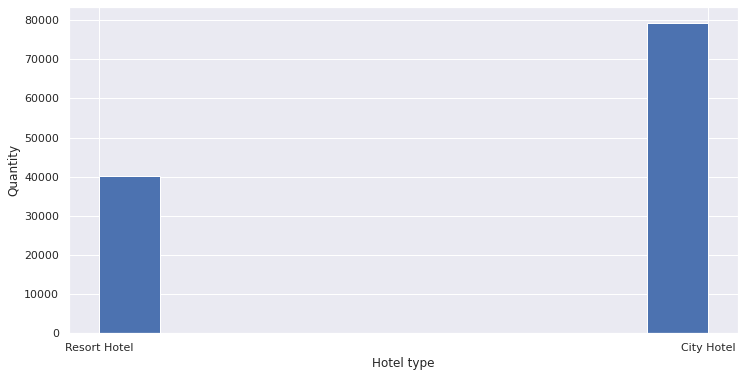

In [ ]:
fig,ax=plt.subplots(figsize=(12,6))
ax.hist(df['hotel'])
ax.set_xlabel('Hotel type')
ax.set_ylabel('Quantity')
plt.show()

In [ ]:
df.dtypes    # To know datatype

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

**DATA CLEANING AND PREPARATION**

In [ ]:
df=df.drop(columns=["arrival_date_year","agent","company","reservation_status_date"])
df.shape
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,July,27,1,0,0,2,0.0,...,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out
1,Resort Hotel,0,737,July,27,1,0,0,2,0.0,...,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out
2,Resort Hotel,0,7,July,27,1,0,1,1,0.0,...,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out
3,Resort Hotel,0,13,July,27,1,0,1,1,0.0,...,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out
4,Resort Hotel,0,14,July,27,1,0,2,2,0.0,...,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out


In [ ]:
duplicate_rows_df=df[df.duplicated()]  #To check row containing duplicate data
print("Number of duplicate rows:",duplicate_rows_df.shape)

Number of duplicate rows: (32267, 28)


In [ ]:
df.count()

hotel                             119390
is_canceled                       119390
lead_time                         119390
arrival_date_month                119390
arrival_date_week_number          119390
arrival_date_day_of_month         119390
stays_in_weekend_nights           119390
stays_in_week_nights              119390
adults                            119390
children                          119386
babies                            119390
meal                              119390
country                           118902
market_segment                    119390
distribution_channel              119390
is_repeated_guest                 119390
previous_cancellations            119390
previous_bookings_not_canceled    119390
reserved_room_type                119390
assigned_room_type                119390
booking_changes                   119390
deposit_type                      119390
days_in_waiting_list              119390
customer_type                     119390
adr             

In [ ]:
df=df.drop_duplicates()  # dropping the duplicates
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,July,27,1,0,0,2,0.0,...,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out
1,Resort Hotel,0,737,July,27,1,0,0,2,0.0,...,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out
2,Resort Hotel,0,7,July,27,1,0,1,1,0.0,...,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out
3,Resort Hotel,0,13,July,27,1,0,1,1,0.0,...,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out
4,Resort Hotel,0,14,July,27,1,0,2,2,0.0,...,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out


In [ ]:
df.count()

hotel                             87123
is_canceled                       87123
lead_time                         87123
arrival_date_month                87123
arrival_date_week_number          87123
arrival_date_day_of_month         87123
stays_in_weekend_nights           87123
stays_in_week_nights              87123
adults                            87123
children                          87119
babies                            87123
meal                              87123
country                           86672
market_segment                    87123
distribution_channel              87123
is_repeated_guest                 87123
previous_cancellations            87123
previous_bookings_not_canceled    87123
reserved_room_type                87123
assigned_room_type                87123
booking_changes                   87123
deposit_type                      87123
days_in_waiting_list              87123
customer_type                     87123
adr                               87123


In [ ]:
print(df.isnull().sum())  #finding the null values

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           451
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car_parking_spaces         0
total_of_spe

In [ ]:
df=df.dropna() #dropping the missing values, will drop the not available values
df.count()

hotel                             86668
is_canceled                       86668
lead_time                         86668
arrival_date_month                86668
arrival_date_week_number          86668
arrival_date_day_of_month         86668
stays_in_weekend_nights           86668
stays_in_week_nights              86668
adults                            86668
children                          86668
babies                            86668
meal                              86668
country                           86668
market_segment                    86668
distribution_channel              86668
is_repeated_guest                 86668
previous_cancellations            86668
previous_bookings_not_canceled    86668
reserved_room_type                86668
assigned_room_type                86668
booking_changes                   86668
deposit_type                      86668
days_in_waiting_list              86668
customer_type                     86668
adr                               86668


In [ ]:
print(df.isnull().sum()) #after dropping the values

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000,86668.000000
mean,0.273884,80.033623,26.839514,15.817741,1.007592,2.628883,1.878583,0.139452,0.010846,0.039346,0.030057,0.177263,0.272523,0.735727,106.604624,0.083710,0.700801
std,0.445953,85.990822,13.654389,8.834580,1.028408,2.041877,0.626190,0.457155,0.113670,0.194417,0.369813,1.720550,0.728841,9.891722,54.987661,0.280802,0.832121
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,12.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.250000,0.000000,0.000000
50%,0.000000,49.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.550000,0.000000,0.000000
75%,1.000000,125.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.100000,0.000000,1.000000
max,1.000000,737.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


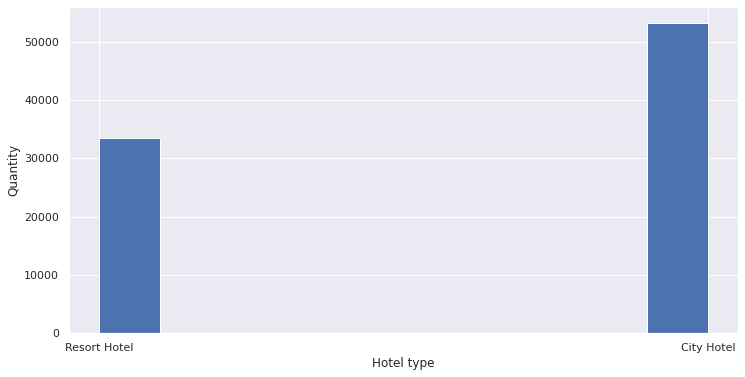

In [ ]:
fig,ax=plt.subplots(figsize=(12,6))
ax.hist(df['hotel'])
ax.set_xlabel('Hotel type')
ax.set_ylabel('Quantity')
plt.show()

<Figure size 1440x1800 with 0 Axes>

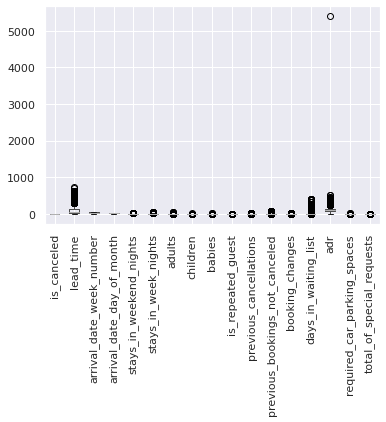

<Figure size 1440x1800 with 0 Axes>

In [ ]:
df.boxplot() # to find outliers
plt.xticks(rotation=90)
plt.figure(figsize=(20,25))

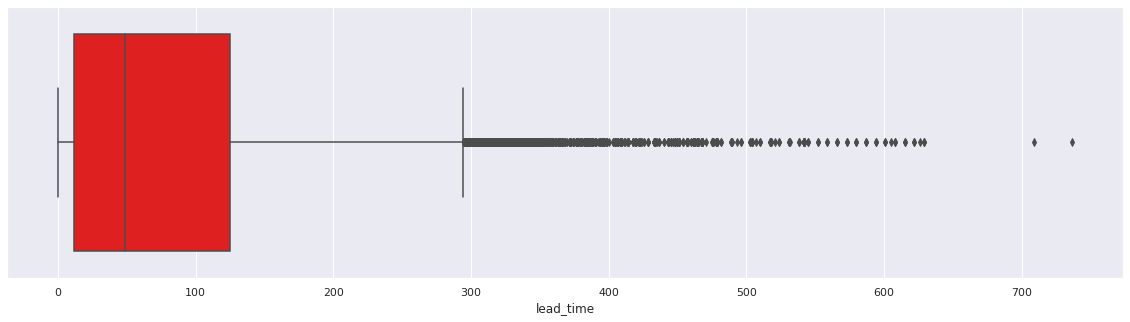

In [ ]:
plt.figure(figsize=(20,5))     #outliers for lead_time
sns.boxplot(x=df['lead_time'],color='Red')

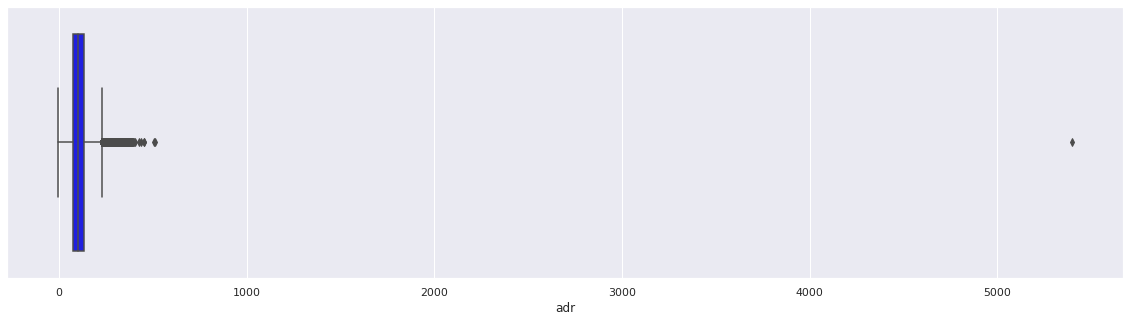

In [ ]:
plt.figure(figsize=(20,5))   #ouliers for address of the customers
sns.boxplot(x=df['adr'],color='Blue')

In [ ]:
q1  =  df.quantile(0.25)  #dropping outliers
q3  =  df.quantile(0.75)
IQR  =  q3-q1
print("\nInternalQuartileRange\n",IQR)
df1  =  df[~((df < (q1 - 1.5*IQR)) | (df > (q3 + 1.5 * IQR))).any(axis=1)]
df1.head(5)
df1.shape


InternalQuartileRange
 is_canceled                         1.00
lead_time                         113.00
arrival_date_week_number           21.00
arrival_date_day_of_month          15.00
stays_in_weekend_nights             2.00
stays_in_week_nights                3.00
adults                              0.00
children                            0.00
babies                              0.00
is_repeated_guest                   0.00
previous_cancellations              0.00
previous_bookings_not_canceled      0.00
booking_changes                     0.00
days_in_waiting_list                0.00
adr                                61.85
required_car_parking_spaces         0.00
total_of_special_requests           1.00
dtype: float64


<ipython-input-56-b083319c4697>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df1  =  df[~((df < (q1 - 1.5*IQR)) | (df > (q3 + 1.5 * IQR))).any(axis=1)]


(39525, 28)

In [ ]:
grp=df.groupby('arrival_date_month')
p=grp['lead_time'].agg(np.mean)
q=grp['stays_in_week_nights'].agg(np.mean)
r=grp['stays_in_weekend_nights'].agg(np.mean)
s=grp['booking_changes'].agg(np.sum)
t=grp['days_in_waiting_list'].agg(np.sum)
u=grp['adr'].agg(np.mean)
v=grp['hotel'].agg(np.sum)
print(p)
print(q)
print(r)
print(s)
print(t)
print(u)
print(v)

arrival_date_month
April         76.024487
August       102.652779
December      59.271076
February      35.342014
January       34.692840
July         112.083300
June         103.931057
March         53.619188
May           91.950397
November      47.780142
October       83.195453
September     93.909448
Name: lead_time, dtype: float64
arrival_date_month
April        2.446117
August       3.014453
December     2.426654
February     2.292752
January      2.343284
July         2.997600
June         2.813090
March        2.538699
May          2.515049
November     2.484904
October      2.360297
September    2.710534
Name: stays_in_week_nights, dtype: float64
arrival_date_month
April        1.004081
August       1.145062
December     0.899704
February     0.927019
January      0.848583
July         1.208100
June         1.044496
March        0.866702
May          0.964002
November     0.854914
October      0.966769
September    1.069122
Name: stays_in_weekend_nights, dtype: float64
arriva

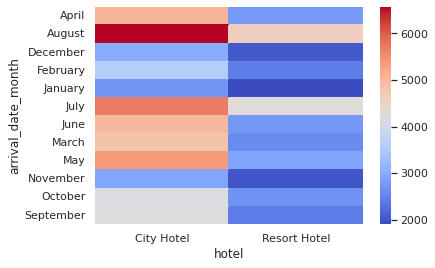

In [ ]:
import seaborn as sns
sns.heatmap(pd.crosstab(df.arrival_date_month,df.hotel),cmap='coolwarm')

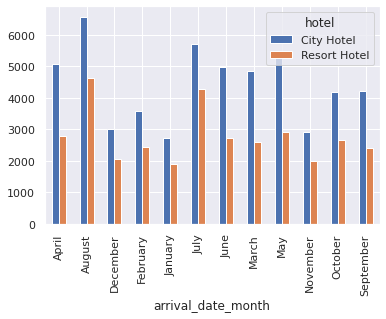

In [ ]:
df1=df.groupby(['arrival_date_month','hotel']).size()
df1=df1.unstack()
df1.plot(kind='bar')

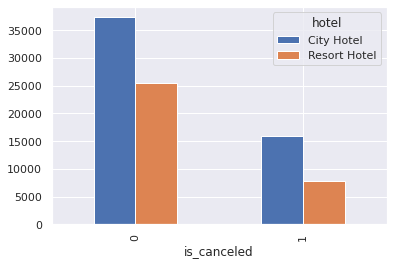

In [ ]:
df2=df.groupby(['is_canceled','hotel']).size()
df2=df2.unstack()
df2.plot(kind='bar')

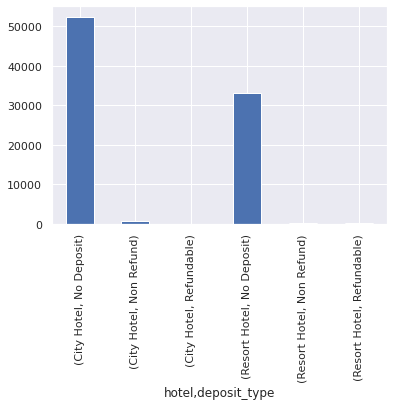

In [ ]:
df3=df.groupby(['hotel','deposit_type']).size()
#df1=df1.unstack()
df3.plot(kind='bar')

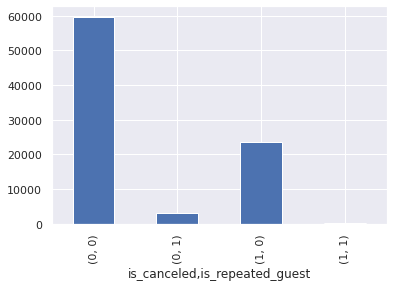

In [ ]:
df4=df.groupby(['is_canceled','is_repeated_guest']).size()
#df4=df4.unstack()
df4.plot(kind='bar')

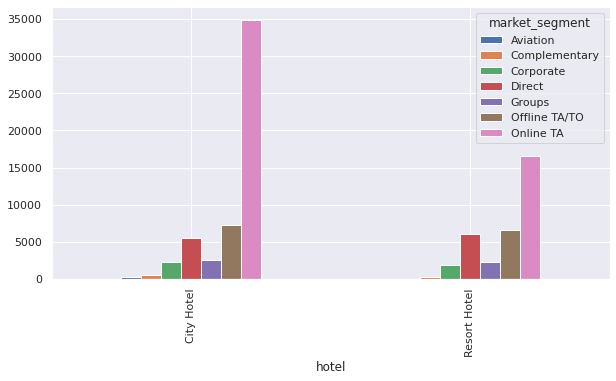

In [ ]:
df5=df.groupby(['hotel','market_segment']).size()
df5=df5.unstack()
df5.plot(kind='bar',figsize=(10,5))

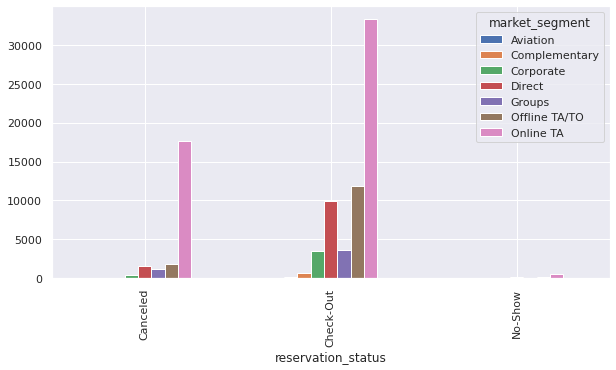

In [ ]:
df6=df.groupby(['reservation_status','market_segment']).size()
df6=df6.unstack()
df6.plot(kind='bar',figsize=(10,5))

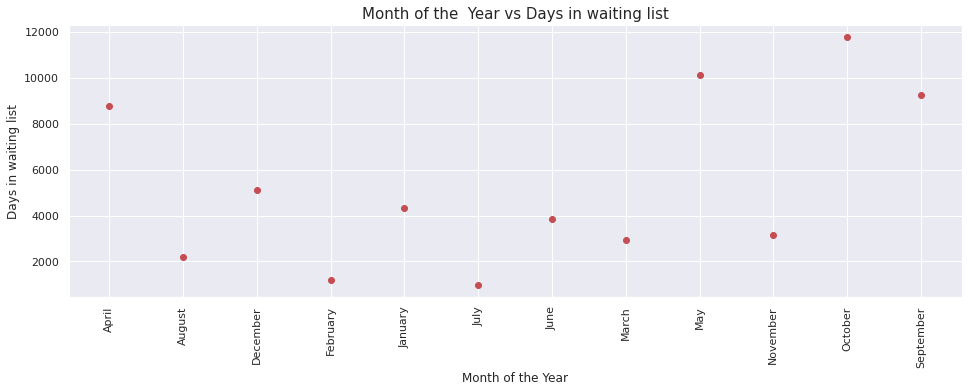

In [ ]:
plt.figure(figsize=(16,5))
plt.plot(t,'ro',color='r')
plt.xticks(rotation=90)
plt.title("Month of the  Year vs Days in waiting list",fontsize=15)
plt.xlabel('Month of the Year')
plt.ylabel('Days in waiting list')
plt.show()

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.181671,0.000539,0.005123,0.059999,0.083229,0.080534,0.068020,-0.020589,-0.089691,0.050411,-0.050282,-0.093111,0.001423,0.127965,-0.183089,-0.119956
lead_time,0.181671,1.000000,0.100966,0.009624,0.234674,0.311213,0.137391,0.028356,-0.003705,-0.148085,0.004835,-0.076426,0.077450,0.130113,0.020443,-0.085454,0.034090
arrival_date_week_number,0.000539,0.100966,1.000000,0.093805,0.026459,0.027974,0.023861,0.013430,0.013700,-0.037222,0.006202,-0.020776,0.011612,0.013491,0.097686,0.008695,0.046395
arrival_date_day_of_month,0.005123,0.009624,0.093805,1.000000,-0.016884,-0.027513,-0.001618,0.015930,-0.000778,-0.004343,-0.008625,0.000665,0.006519,0.005384,0.021910,0.008704,-0.001716
stays_in_weekend_nights,0.059999,0.234674,0.026459,-0.016884,1.000000,0.550722,0.086360,0.027812,0.013608,-0.108257,-0.020927,-0.054265,0.049025,-0.031604,0.036282,-0.042796,0.030255
stays_in_week_nights,0.083229,0.311213,0.027974,-0.027513,0.550722,1.000000,0.094508,0.030474,0.016000,-0.114911,-0.019012,-0.057077,0.084204,0.002005,0.051431,-0.044123,0.035405
adults,0.080534,0.137391,0.023861,-0.001618,0.086360,0.094508,1.000000,0.022388,0.016232,-0.173440,-0.042238,-0.117888,-0.049204,-0.016514,0.245169,0.009245,0.110842
children,0.068020,0.028356,0.013430,0.015930,0.027812,0.030474,0.022388,1.000000,0.017523,-0.046026,-0.018992,-0.028553,0.030831,-0.020306,0.325980,0.037057,0.044288
babies,-0.020589,-0.003705,0.013700,-0.000778,0.013608,0.016000,0.016232,0.017523,1.000000,-0.013045,-0.005285,-0.008887,0.080894,-0.006799,0.022759,0.030478,0.094570
is_repeated_guest,-0.089691,-0.148085,-0.037222,-0.004343,-0.108257,-0.114911,-0.173440,-0.046026,-0.013045,1.000000,0.207105,0.447235,0.005920,-0.012737,-0.154771,0.072610,-0.001621


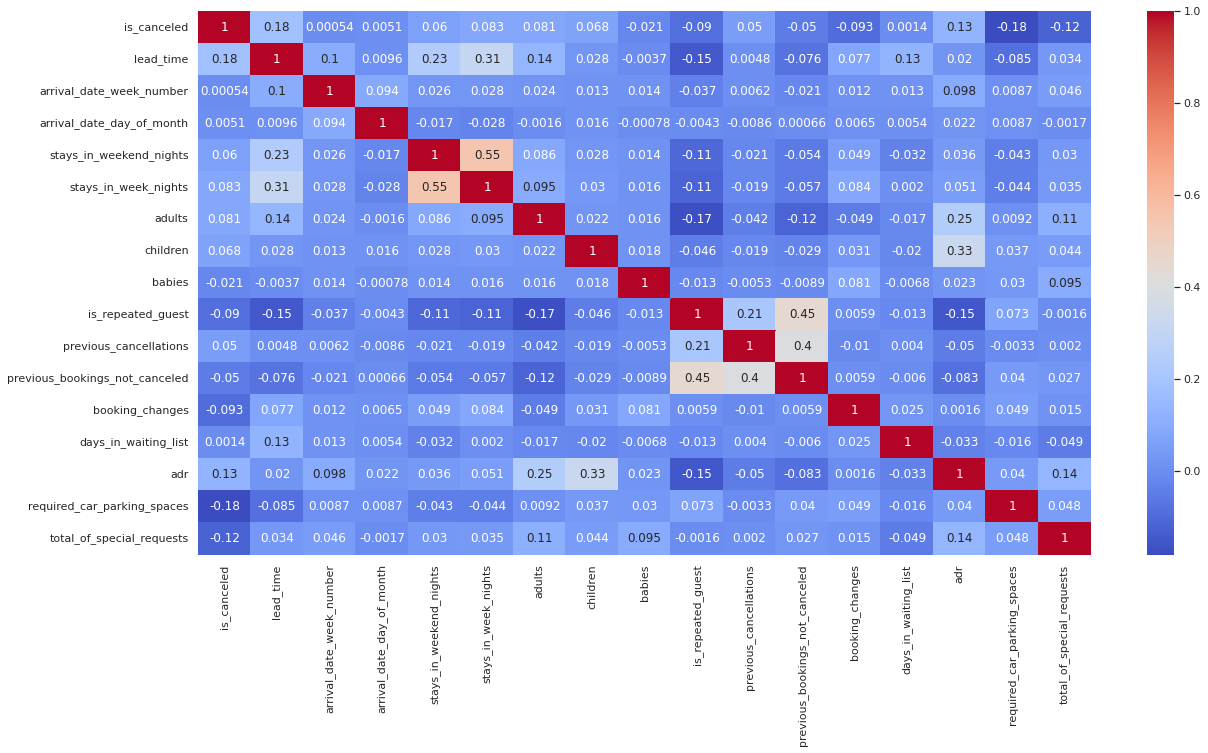

In [ ]:
plt.figure(figsize=(20,10)) #heat map , finding the relations between the variables
c=df.corr()
sns.heatmap(c,cmap='coolwarm',annot=True)
c

**DATA MODELING**

In [ ]:
df.shape

(86668, 28)

In [ ]:
total_cancelations=df["is_canceled"].sum()
print(total_cancelations)
rh_cancelations=df.loc[df['hotel']=="Resort Hotel"]["is_canceled"].sum()
print(rh_cancelations)
ch_cancelations=df.loc[df['hotel']=="City Hotel"]["is_canceled"].sum()
print(ch_cancelations)


23737
7862
15875


In [ ]:
# as percent:
rel_cancel=total_cancelations/df.shape[0]*100
rh_rel_cancel=rh_cancelations/df.loc[df["hotel"]=="Resort Hotel"].shape[0]*100
ch_rel_cancel=ch_cancelations/df.loc[df["hotel"]=="City Hotel"].shape[0]*100


print(f"Total bookings canceled: {total_cancelations:,} ({rel_cancel:.0f} %)")
print(f"Resort hotel bookings canceled: {rh_cancelations:,} ({rh_rel_cancel:.0f} %)")
print(f"City hotel bookings canceled: {ch_cancelations:,} ({ch_rel_cancel:.0f} %)")

Total bookings canceled: 23,737 (27 %)
Resort hotel bookings canceled: 7,862 (24 %)
City hotel bookings canceled: 15,875 (30 %)


In [ ]:
cancel_corr=df.corr()["is_canceled"]
cancel_corr.abs().sort_values(ascending=False)[1:]

required_car_parking_spaces       0.183089
lead_time                         0.181671
adr                               0.127965
total_of_special_requests         0.119956
booking_changes                   0.093111
is_repeated_guest                 0.089691
stays_in_week_nights              0.083229
adults                            0.080534
children                          0.068020
stays_in_weekend_nights           0.059999
previous_cancellations            0.050411
previous_bookings_not_canceled    0.050282
babies                            0.020589
arrival_date_day_of_month         0.005123
days_in_waiting_list              0.001423
arrival_date_week_number          0.000539
Name: is_canceled, dtype: float64

 *we see that lead_time,required_car_parking_space,adr(location of customers),total_of_special_requests are the most important factors for cancellation of booking*
*italicized text*

In [ ]:
#manually choose columns to include
num_features=["lead_time","arrival_date_week_number","arrival_date_day_of_month","stays_in_weekend_nights",
              "stays_in_week_nights","adults","children","babies","is_repeated_guest","previous_cancellations",
              "previous_bookings_not_canceled","required_car_parking_spaces","total_of_special_requests","adr"]
                  
cat_features=["hotel","arrival_date_month","meal","market_segment","distribution_channel",
              "reserved_room_type","deposit_type","customer_type"]

#separate features and predicted value              
features=num_features+cat_features
X=df.drop(["is_canceled"],axis=1)[features]
y=df["is_canceled"]
# preprocessing numerical features:
num_transformer=SimpleImputer(strategy="constant")    #handle missing value
#preprocessing categorical feature:                   #one hot encoding- conversion of categorical into numerical

cat_transformer= Pipeline(steps=[("imputer",SimpleImputer(strategy="constant",fill_value="Unknown")),
               ("onehot", OneHotEncoder(handle_unknown='ignore'))])   
#Bundle preprocessing for numerical and categorical features        
preprocesser=ColumnTransformer(transformers=[("num",num_transformer, num_features),
                                              ("cat", cat_transformer, cat_features)])               

In [ ]:
#define model:
base_models=[("DT_model",DecisionTreeClassifier(random_state=42)),
             ("RF_model",RandomForestClassifier(random_state=42,n_jobs=-1))]

# split data into kfolds parts for cross validation
#use shuffle to ensure random distribution of data
kfolds=4  #4 =75% train, 25% validation
split=KFold(n_splits=kfolds,shuffle=True,random_state=42)

#preprocessing  ,  fitting,    predictions,   scoring for every model:
for name , model in base_models:
  #pack preprocessing of data and the model in a pipeline:
  model_steps=Pipeline(steps=[('preprocesser',preprocesser),('model',model)])

  #get cross validation score for each model:
  cv_results=cross_val_score(model_steps,X,y,cv=split,scoring='accuracy',n_jobs=-1)
  #output:
  min_score=round(min(cv_results),4)
  max_score=round(max(cv_results),4)
  mean_score= round(np.mean(cv_results),4)
  std_dev=round(np.std(cv_results),4)
  print(f"{name} cross validation accuracy score : {mean_score} +/- {std_dev} (std)min:{min_score},max:{max_score}")

DT_model cross validation accuracy score : 0.7484 +/- 0.0027 (std)min:0.744,max:0.7512
RF_model cross validation accuracy score : 0.8067 +/- 0.0022 (std)min:0.8047,max:0.8102


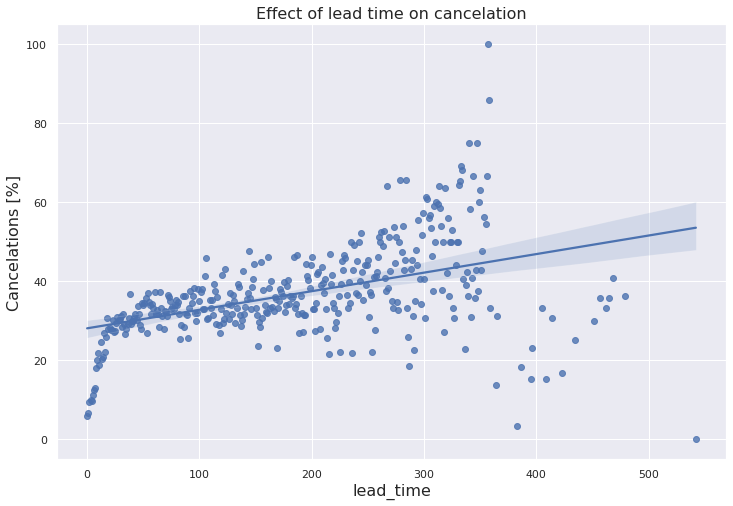

In [ ]:
lead_cancel_data= df.groupby("lead_time")["is_canceled"].describe()
lead_cancel_data_10= lead_cancel_data.loc[lead_cancel_data["count"] >=10]
plt.figure(figsize=(12,8))
sns.regplot(x=lead_cancel_data_10.index,y=lead_cancel_data_10["mean"].values*100)
plt.title("Effect of lead time on cancelation",fontsize=16)
plt.xlabel("lead_time",fontsize=16)
plt.ylabel("Cancelations [%]",fontsize=16)
plt.show()